In [ ]:
Forecast the CocaCola prices  set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [ ]:
# importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
# reading file

In [4]:
data=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [ ]:
# eda

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [7]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

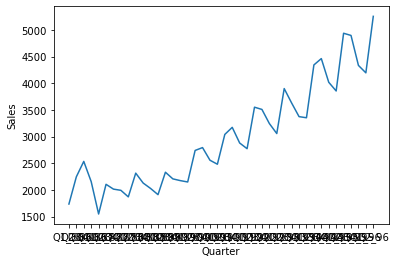

In [8]:
sns.lineplot(x='Quarter',y='Sales',data=data)

<AxesSubplot:>

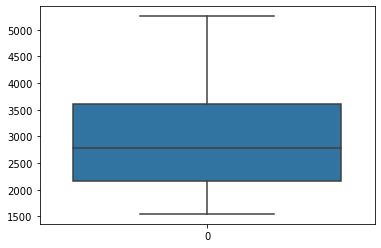

In [9]:
sns.boxplot(data=data['Sales'])

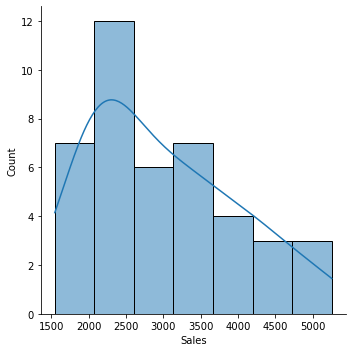

In [10]:
sns.displot(data['Sales'],kde=True)

(array([ 4., 10.,  5.,  4.,  6.,  3.,  3.,  4.,  0.,  3.]),
 array([1547.81899643, 1918.33709679, 2288.85519714, 2659.3732975 ,
        3029.89139786, 3400.40949821, 3770.92759857, 4141.44569893,
        4511.96379929, 4882.48189964, 5253.        ]),
 <BarContainer object of 10 artists>)

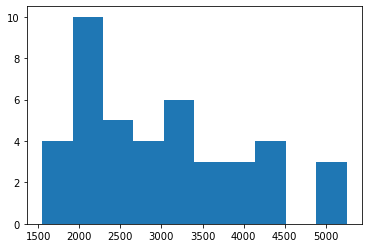

In [11]:
plt.hist(data['Sales'])

In [12]:
quarter =['Q1','Q2','Q3','Q4']

In [13]:
p = data["Quarter"][0]
p[0:2]
data['quarter']= 0

for i in range(42):
    p = data["Quarter"][i]
    data['quarter'][i]= p[0:2]

data.head()

C:\Users\berri\AppData\Local\Temp\ipykernel_16016\3621244596.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quarter'][i]= p[0:2]


,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [14]:
df=pd.get_dummies(data['quarter'])
df
coke=pd.concat([data,df],axis=1)
coke

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [15]:
coke['T']=np.arange(1,43)
coke['T_sq']=coke['T']**2
coke['log_sales']=np.log(coke['Sales'])
coke

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,T,T_sq,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [16]:
Train = coke.head(30)
Test = coke.tail(10)

In [17]:
linear_model = smf.ols('Sales~T',data=Train).fit()                                                #Linear
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['T'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
print("RMSE Linear: ",rmse_linear)

RMSE Linear:  777.6287139221071


In [18]:
Exp_model = smf.ols('log_sales~T',data=Train).fit()                                                #Exponential
pred_exp = pd.Series(Exp_model.predict(pd.DataFrame(Test['T'])))
rmse_exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_exp)))**2))
print("RMSE EXP: ",rmse_exp)

RMSE EXP:  600.0893693739741


In [19]:
Quad_model = smf.ols('Sales~T+T_sq',data=Train).fit()                                             #Quadratic 
pred_Quad = pd.Series(Quad_model.predict(Test[["T","T_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
print("RMSE Quadratic: ",rmse_Quad)

RMSE Quadratic:  680.2527854192889


In [20]:
add_sea_model = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()                                   #Additive seasonality
pred_add_sea = pd.Series(add_sea_model.predict(Test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
print("RMSE Additive seasonality: ",rmse_add_sea)

RMSE Additive seasonality:  1898.3504804157517


In [21]:
add_sea_Quad_model = smf.ols('Sales~T+T_sq+Q1+Q2+Q3+Q4',data=Train).fit()        #Additive Seasonality Quadratic
pred_add_sea_quad = pd.Series(add_sea_Quad_model.predict(Test[['Q1', 'Q2', 'Q3', 'Q4','T','T_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
print("RMSE Additive Seasonality Quadratic:",rmse_add_sea_quad )

RMSE Additive Seasonality Quadratic: 607.8520720183552


In [22]:
Mul_sea_model = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = Train).fit()          # Multiplicative Seasonality
pred_Mult_sea = pd.Series(Mul_sea_model.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
print("RMSE Multiplicative Seasonality:",rmse_Mult_sea)

RMSE Multiplicative Seasonality: 1951.0349399697623


In [23]:
Mul_Add_sea_model = smf.ols('log_sales~T+Q1+Q2+Q3+Q4',data = Train).fit()    #Multiplicative Additive Seasonality
pred_Mult_add_sea = pd.Series(Mul_Add_sea_model.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE Multiplicative Additive Seasonality:",rmse_Mult_add_sea )

RMSE Multiplicative Additive Seasonality: 449.40354891629227


In [24]:
Q = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),         #Testing
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}              
table_rmse=pd.DataFrame(Q)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,777.628714
1,rmse_Exp,600.089369
2,rmse_Quad,680.252785
3,rmse_add_sea,1898.350480
4,rmse_add_sea_quad,607.852072
5,rmse_Mult_sea,1951.034940
6,rmse_Mult_add_sea,449.403549


In [25]:
D = [['Q3_97', 'Q3'], ['Q4_97', 'Q4'], ['Q1_98', 'Q1'],['Q2_98', 'Q2']]
print(D)
forecast = pd.DataFrame(D, columns = ['Quarter', 'quarter'])
forecast

[['Q3_97', 'Q3'], ['Q4_97', 'Q4'], ['Q1_98', 'Q1'], ['Q2_98', 'Q2']]


,Quarter,quarter
0,Q3_97,Q3
1,Q4_97,Q4
2,Q1_98,Q1
3,Q2_98,Q2


In [26]:
dummies = pd.DataFrame(pd.get_dummies(forecast['quarter']))         # Create dummies and T and T-Squared columns
forecast1 = pd.concat([forecast,dummies],axis = 1)
forecast1["T"] = np.arange(1,5)   
forecast1["T_sq"] = forecast1["T"]*forecast1["T"] 
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

   Quarter quarter  Q1  Q2  Q3  Q4  T  T_sq
0   Q3_97      Q3   0   0   1   0  1     1
1   Q4_97      Q4   0   0   0   1  2     4
2   Q1_98      Q1   1   0   0   0  3     9
3   Q2_98      Q2   0   1   0   0  4    16


In [27]:
model_full = smf.ols('log_sales~T+Q1+Q2+Q3+Q4',data=coke).fit()        # Forecasting using Multiplicative Additive Seasonality Model
pred_new  = pd.Series(model_full.predict(forecast1))
pred_new
forecast1["forecasted_sales"] = pd.Series(pred_new)
forecast1["forecasted_log"]=np.exp(forecast1["forecasted_sales"])

In [28]:
pred_new

0    7.522993
1    7.442919
2    7.387558
3    7.628081
dtype: float64

In [29]:
Final_predict = forecast1.loc[:, ['Quarter', 'forecasted_log']]           # Final Prediction
Final_predict

,Quarter,forecasted_log
0,Q3_97,1850.097087
1,Q4_97,1707.728369
2,Q1_98,1615.755820
3,Q2_98,2055.102678


In [30]:
# using arima model

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')


In [49]:
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<AxesSubplot:>

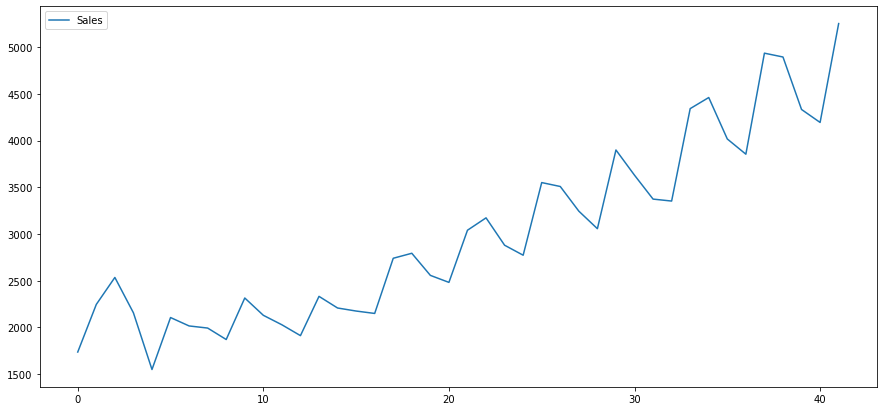

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
data.plot()


In [51]:
from statsmodels.tsa.stattools import adfuller


In [53]:
test_result=adfuller(data['Sales'])


In [58]:
def adfuller_test(sales):
    test_result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(test_result,labels):
        print(label+' : '+str(value) )

if test_result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(data['Sales'])

weak evidence against null hypothesis,indicating it is non-stationary 
ADF Test Statistic : 1.3094210153268104
p-value : 0.9966611673930905
#Lags Used : 7
Number of Observations : 34


In [60]:
data['Sales First Difference'] = data['Sales'] - data['Sales'].shift(1)
data['Seasonal First Difference']=data['Sales']-data['Sales'].shift(12)
data.head()


,Quarter,Sales,Sales First Difference,Seasonal First Difference
0,Q1_86,1734.827000,NaN,NaN
1,Q2_86,2244.960999,510.133999,NaN
2,Q3_86,2533.804993,288.843994,NaN
3,Q4_86,2154.962997,-378.841995,NaN
4,Q1_87,1547.818996,-607.144001,NaN


In [62]:
# Again testing if data is stationary
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -1.4618821846805747
p-value : 0.5522764133805176
#Lags Used : 9
Number of Observations : 20


<AxesSubplot:>

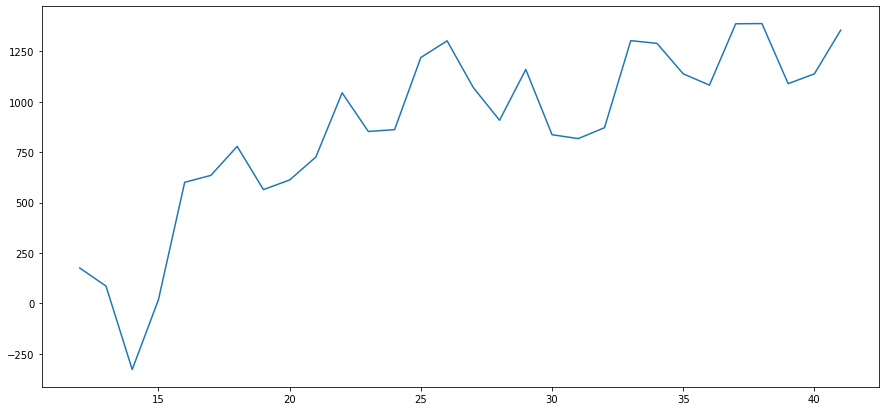

In [63]:
data['Seasonal First Difference'].plot()


In [64]:
#I am going to create auto-correlation :



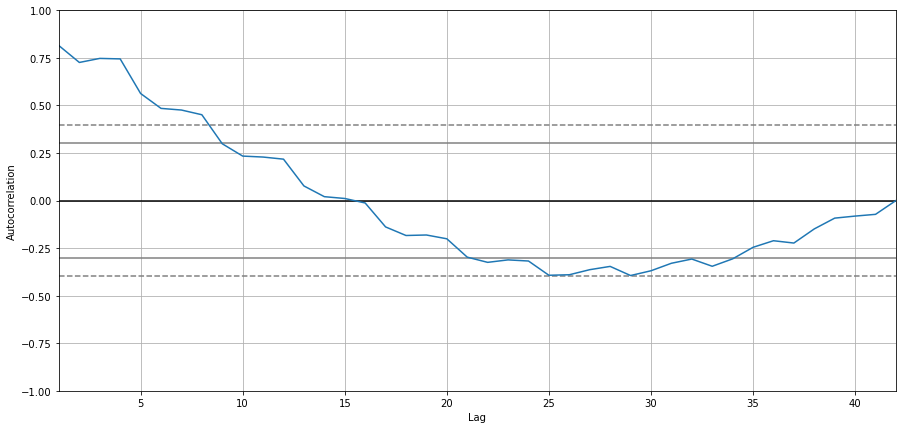

In [65]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Sales'])
plt.show()

ValueError: could not broadcast input array from shape (30,) into shape (41,)

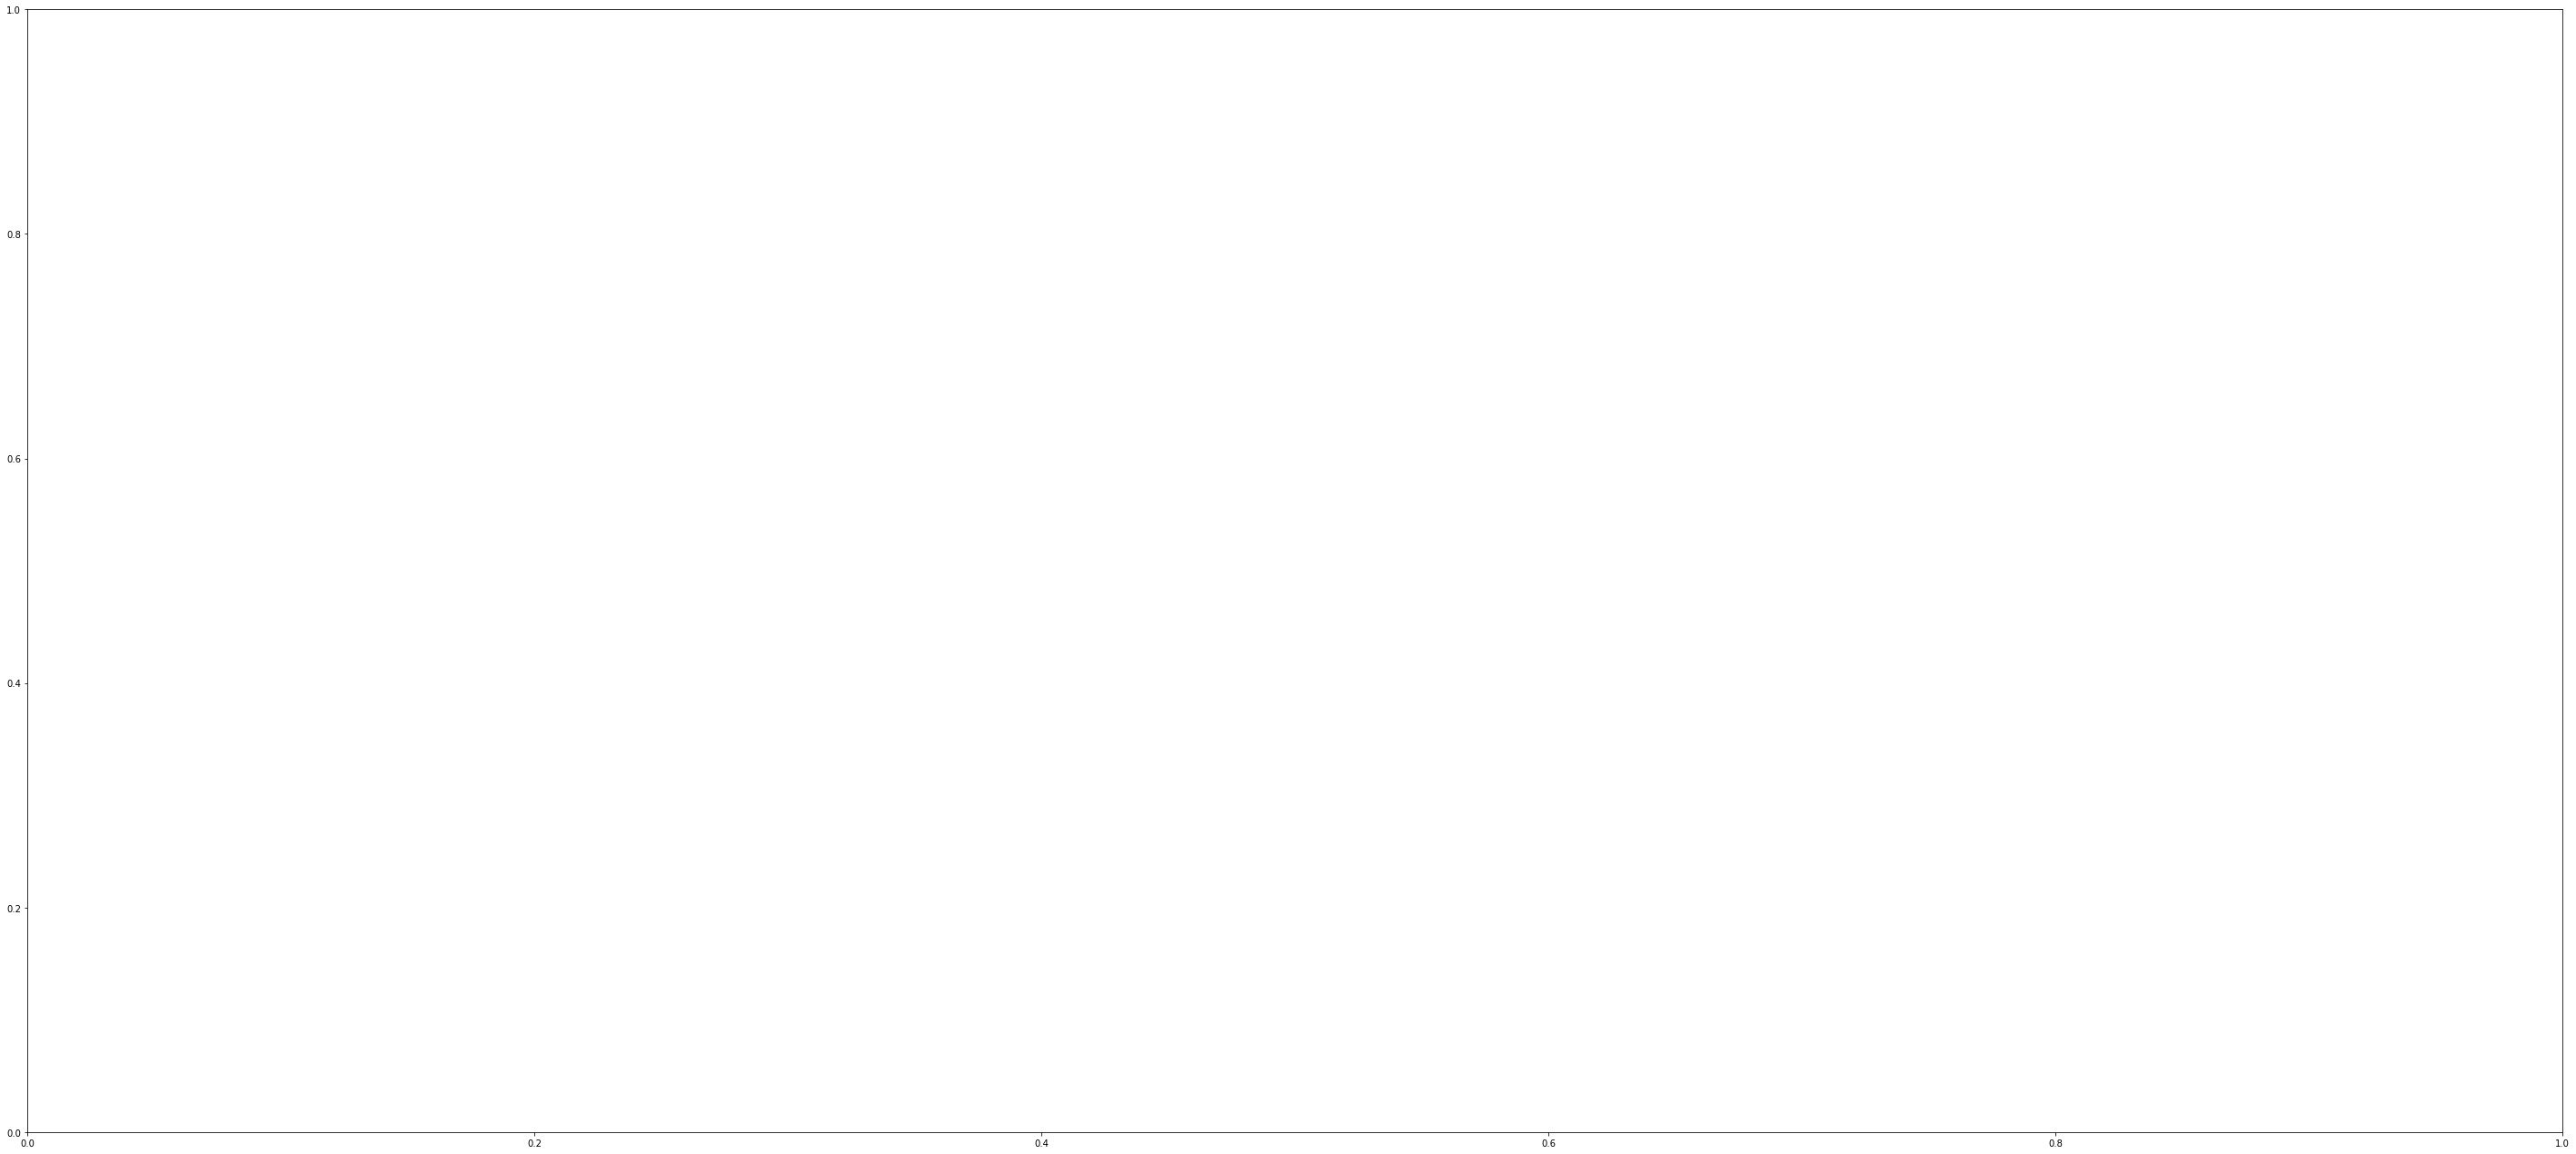

In [74]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(50,50))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Seasonal First Difference'].dropna(),lags= 40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal First Difference'].dropna(),lags=40,ax=ax2)


In [72]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data['Sales'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
